ESPECIALIZAÇÃO EM INTELIGÊNCIA ARTIFICIAL

MÓDULO: FUNDAMENTOS DE INTELIGÊNCIA ARTIFICIAL

Prof. Tatiana Tavares

Referências:
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

https://ralph7c2.shinyapps.io/k-means_simulator/

paper: Andrew L. Maas, Awni Y. Hannun, Andrew Y. Ng (2014). Rectifier Nonlinearities Improve Neural Network Acoustic Models

dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html


    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============
    
 Existem 4 características: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala.
 Há 3 classes de flores: Setosa, Versicolor and Virginica

**********************************************************************************************

Outra forma de carregar o dataset iris. Direto da biblioteca sklearn

from sklearn import datasets

iris = datasets.load_iris()

In [1]:
"""
ESPECIALIZAÇÃO EM INTELIGÊNCIA ARTIFICIAL

MÓDULO: FUNDAMENTOS DE INTELIGÊNCIA ARTIFICIAL

Prof. Tatiana Tavares
"""

import os
import pandas as pd
import numpy as np
import os.path as path
import warnings
import pickle as pck

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pickle
import time
from tempfile import TemporaryFile

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.text import TSNEVisualizer

warnings.filterwarnings("ignore")
import sklearn
print(sklearn.__version__)

0.24.1


# Input data

In [2]:
np.random.seed(42)

data = pd.read_csv('iris_dataset.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(data.shape)

(150, 6)


In [4]:
# Separa as 4 colunas de features (X = inputs da ML) e a coluna label (y)

X = data.iloc [:, [1,2,3,4]]
y = data.iloc [:, [5]]  

print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


Para abordar com eficácia esse conjunto de dados e começar a preparar o caminho para a direção a seguir, uma das coisas recomendadas a fazer é executar estatísticas descritivas simples sobre os dados. I

X - matriz de entrada

y - labels. Não serão usados durante o treinamento. 
    Após o calculo dos clusters, estes labels são utilizados para avaliar os clusters.

In [5]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Esta tabela resume todas as colunas numéricas do conjunto de dados. É particularmente útil para obter uma noção geral dos dados e como estão estruturados. Por exemplo, olhando para o intervalo e interquartil, podemos identificar rapidamente que o comprimento da pétala é a variável mais ampla e variada e a largura da sépala é a variável menos variada. Essa pode ser uma informação útil ao abordar o estágio de modelagem para entender como cada uma das variáveis contribui para o poder preditivo do modelo.

A base de nossa análise está centrada nas espécies. Para desenvolver uma compreensão de como cada uma das variáveis se comporta com base em suas espécies, podemos produzir uma tabela dinâmica com suas médias.

In [6]:
data_temp = data.iloc [:, [1,2,3,4,5]]
data_temp.pivot_table(index='Species', values=['SepalLengthCm','SepalWidthCm',
                'PetalLengthCm','PetalWidthCm','Species'],aggfunc=np.mean)

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
Species,,,,
Iris-setosa,1.464,0.244,5.006,3.418
Iris-versicolor,4.260,1.326,5.936,2.770
Iris-virginica,5.552,2.026,6.588,2.974


Podemos deduzir desta tabela que, em média, os comprimentos e larguras das pétalas de Setosa são muito menores do que os de Versicolor e Virginica. Embora Virginica tenha as maiores dimensões de pétalas, em média. Podemos ver que, em média, os comprimentos das sépalas são bastante próximos em tamanho, porém Setosa tem larguras das sépalas visivelmente maiores do que as outras espécies. Este pivô nos diz que as espécies Setosa possuem algumas características distintas.

In [7]:
# seleciona os valores no dataframe - y é uma string
X = X.values
y = y.values

In [8]:
print(y[1])

['Iris-setosa']


In [9]:
# codifica os labels com valores entre 0 e n_classes - 1
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoder = le.transform(y)
y_encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
#  dimensionando cada feature para um determinado intervalo, padrão 0 e 1. Esta transformação é freqüentemente usada como uma alternativa para média zero e variância unitária.
data_input = MinMaxScaler().fit_transform(X)

In [11]:
data_input[:4]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667]])

In [12]:
data_input, y_encoder = shuffle(data_input, y_encoder, random_state = 40)

In [13]:
print(data_input.shape)
print(y_encoder.shape)

print(data_input.min())
print(data_input.max())

(150, 4)
(150,)
0.0
1.0


Text(0, 0.5, 'Sepal Width')

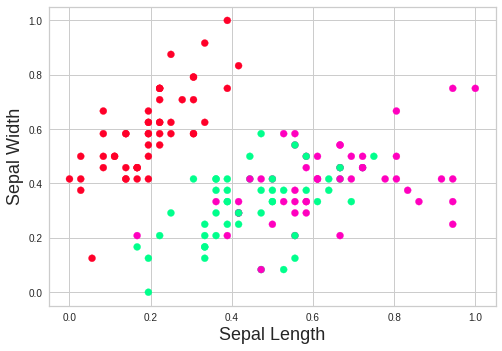

In [14]:
# plot com as 2 primeiras features - 'SepalLengthCm','SepalWidthCm'
plt.scatter (data_input[:, 0], data_input[:, 1], c = y_encoder, cmap = 'gist_rainbow') 
plt.xlabel ('Sepal Length', fontsize = 18) 
plt.ylabel ('Sepal Width', fontsize = 18)

#  Helper Methods

In [15]:
GALLERY = path.join("gallery") 
def newfig():
    """
    Helper function to create an axes object of the gallery dimensions.
    """
    # NOTE: this figsize generates a better thumbnail
    _, ax = plt.subplots(figsize=(15, 10))
    return ax

def savefig(viz, name, gallery=GALLERY):
    """
    Saves the figure to the gallery directory
    """
    if not path.exists(gallery):
        os.makedirs(gallery)

    # Must save as png
    if len(name.split(".")) > 1:
        raise ValueError("name should not specify extension")

    outpath = path.join(gallery, name + ".png")
    viz.show(outpath=outpath)
    print("created {}".format(outpath)) 

#  Clustering

In [16]:
def elbow(X):
    kmeans = KMeans(max_iter=30, tol=0.0001)
    Elbow_visualizer = KElbowVisualizer(kmeans, k=(2,8), ax=newfig())
    Elbow_visualizer.fit(X)   
    savefig(Elbow_visualizer, "elbow")
    
    # The optimal value of k
    k = Elbow_visualizer.elbow_value_
    print("The optimal value of k:", k)
    return k

def silhouette(X, k):
    kmeans = KMeans(k)
    Silhouette_visualizer = SilhouetteVisualizer(kmeans, ax=newfig())
    Silhouette_visualizer.fit(X)
    savefig(Silhouette_visualizer, "silhouette")
    
    # Save model 
    with open('model_kmeans', 'wb') as fp:
         pickle.dump(kmeans, fp)

def icdm(X, k):
    kmeans = KMeans(k)
    InterclusterDistance_visualizer = InterclusterDistance(kmeans, ax=newfig())
    InterclusterDistance_visualizer.fit(X)
    savefig(InterclusterDistance_visualizer, "icdm")

# Elbow

created gallery/elbow.png
The optimal value of k: 3


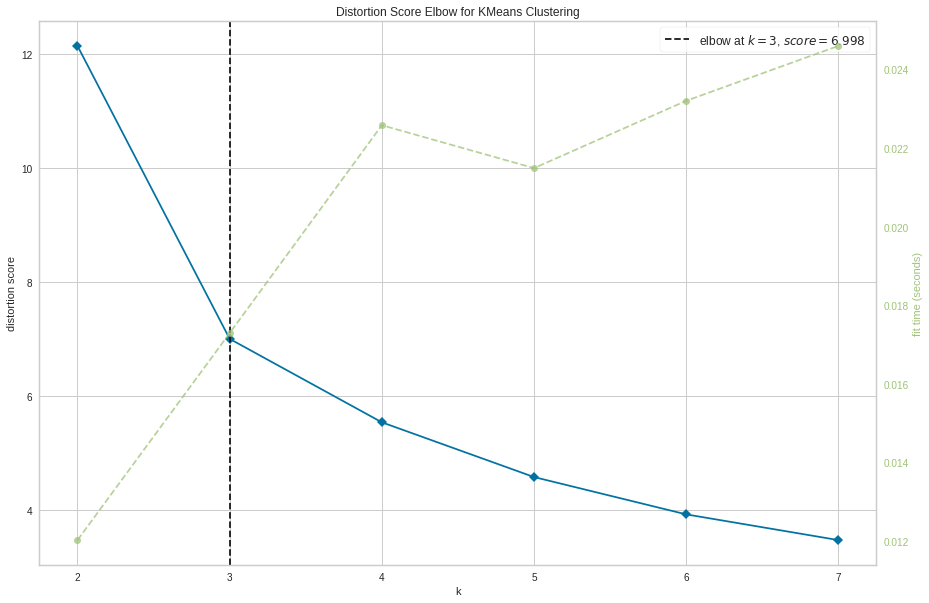

In [17]:
# select k using the elbow method
k = elbow(data_input)
#k = 3

# Silhouette Visualizer 

created gallery/silhouette.png


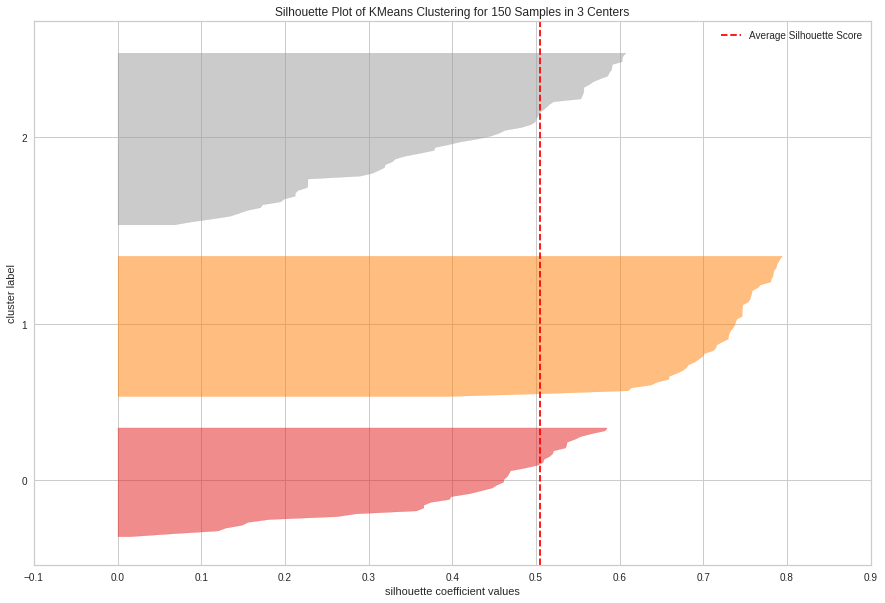

In [18]:
# select k by visualizing silhouette coefficient values
silhouette(data_input, k)

# Intercluster Distance Maps

created gallery/icdm.png


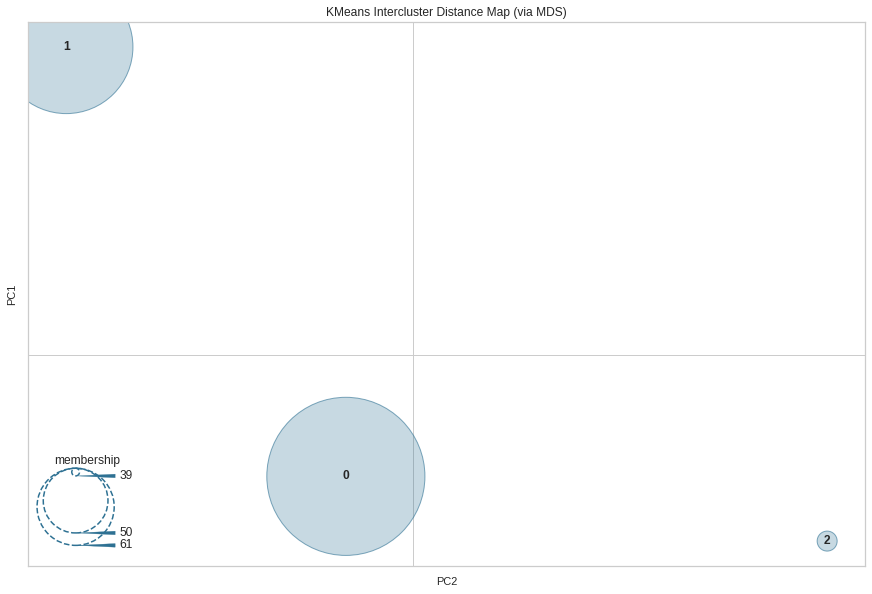

In [19]:
# show relative distance and size/importance of clusters
icdm(data_input, k)

# Calculated Labels

In [59]:
loaded_model_Elbow_visualizer = pickle.load(open('model_kmeans', 'rb'))

In [60]:
cluster_kmeans = loaded_model_Elbow_visualizer.labels_
label = y_encoder

In [61]:
df_data_input = pd.DataFrame(data_input)
df_data_input

,0,1,2,3
0,0.027778,0.416667,0.050847,0.041667
1,0.361111,0.416667,0.593220,0.583333
2,0.583333,0.500000,0.728814,0.916667
3,0.944444,0.750000,0.966102,0.875000
4,0.333333,0.208333,0.508475,0.500000
...,...,...,...,...
145,0.500000,0.333333,0.508475,0.500000
146,0.138889,0.416667,0.067797,0.000000
147,0.750000,0.500000,0.627119,0.541667
148,0.194444,0.583333,0.084746,0.041667


In [62]:
df_data_input['cluster_kmeans'] = cluster_kmeans
df_data_input['label'] = label
df_data_input

,0,1,2,3,cluster_kmeans,label
0,0.027778,0.416667,0.050847,0.041667,1,0
1,0.361111,0.416667,0.593220,0.583333,2,1
2,0.583333,0.500000,0.728814,0.916667,0,2
3,0.944444,0.750000,0.966102,0.875000,0,2
4,0.333333,0.208333,0.508475,0.500000,2,1
...,...,...,...,...,...,...
145,0.500000,0.333333,0.508475,0.500000,2,1
146,0.138889,0.416667,0.067797,0.000000,1,0
147,0.750000,0.500000,0.627119,0.541667,0,1
148,0.194444,0.583333,0.084746,0.041667,1,0


In [63]:
# verificar os valores únicos por cluster
df_data_input['cluster_kmeans'].value_counts()

2    61
1    50
0    39
Name: cluster_kmeans, dtype: int64

In [64]:
filtered_df_data_input_0 = df_data_input.query('cluster_kmeans == 0')
filtered_df_data_input_1 = df_data_input.query('cluster_kmeans == 1')
filtered_df_data_input_2 = df_data_input.query('cluster_kmeans == 2')

print(filtered_df_data_input_0)
print(filtered_df_data_input_1)
print(filtered_df_data_input_2)

            0         1         2         3  cluster_kmeans  label
2    0.583333  0.500000  0.728814  0.916667               0      2
3    0.944444  0.750000  0.966102  0.875000               0      2
5    0.555556  0.583333  0.779661  0.958333               0      2
15   0.666667  0.541667  0.796610  1.000000               0      2
17   0.666667  0.541667  0.796610  0.833333               0      2
20   0.583333  0.333333  0.779661  0.875000               0      2
21   0.916667  0.416667  0.949153  0.833333               0      2
27   0.611111  0.416667  0.762712  0.708333               0      2
35   0.583333  0.333333  0.779661  0.833333               0      2
43   0.777778  0.416667  0.830508  0.833333               0      2
44   0.805556  0.500000  0.847458  0.708333               0      2
46   0.944444  0.250000  1.000000  0.916667               0      2
50   0.555556  0.541667  0.847458  1.000000               0      2
58   0.583333  0.291667  0.728814  0.750000               0   

In [65]:
# atribuir os nomes corretos aos clusters cluster_0 = label_1, cluster_1 = label_0 e cluster_2 = label_2
re_cluster_kmeans = np.choose(loaded_model_Elbow_visualizer.labels_,[1,0,2]).astype(np.int64)

In [66]:
re_cluster_kmeans

array([0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2,
       1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2])

In [67]:
label

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1,
       1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1])

# Cluster analysis

In [68]:
# Métricas da validação da Bagging 
n_acertos = 0
for u in range(0, len(label)):
    if re_cluster_kmeans[u] == label[u]:
        n_acertos += 1 
print('Number of acertos: ' + str((n_acertos/len(y_encoder))*100))  

Number of acertos: 44.666666666666664
